In [683]:
import importlib
import pipeline as pp
import stats_hc as hc
from matplotlib import pyplot as plt
import pandas as pd

In [684]:
tab20 = plt.get_cmap('tab20').colors
hex_colors = ['#' + ''.join(f'{int(c*255):02x}' for c in color) for color in tab20]
print(hex_colors)

['#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78', '#2ca02c', '#98df8a', '#d62728', '#ff9896', '#9467bd', '#c5b0d5', '#8c564b', '#c49c94', '#e377c2', '#f7b6d2', '#7f7f7f', '#c7c7c7', '#bcbd22', '#dbdb8d', '#17becf', '#9edae5']


In [685]:
# Define the types
types = [
    'fake',
    'conspiracy',
    'junksci',
    'hate',
    'unreliable',
    'bias',
    'satire',
    'reliable',
    'clickbait',
    'political',
]
# Assign colors to each type from the Tab20 color map
colors = plt.get_cmap('tab10').colors[:len(types)]
# Add black color for unknown types
unknown_types = set(types)  # get all other unknown types
colors += tuple(['black'] * len(unknown_types))  # add black color for other unknown types
# Create a dictionary mapping each type to its assigned color
types_colors = {types[i]: colors[i] for i in range(len(types))}

types_liar = [
    'pants-fire',
    'false',
    'mostly-false',
    'barely-true',
    'half-true',
    'mostly-true',
    'true',
]
# Assign colors to each type from the Tab20 color map
colors = plt.get_cmap('tab10').colors[:len(types_liar)]
# Add black color for unknown types
unknown_types = set(types_liar)  # get all other unknown types
colors += tuple(['black'] * len(unknown_types))  # add black color for other unknown types
# Create a dictionary mapping each type to its assigned color
types_liar_colors = {types_liar[i]: colors[i] for i in range(len(types_liar))}

In [686]:
importlib.reload(hc)
liar_set = True
if liar_set:
    data = pd.read_csv("../datasets/liar_dataset/cleaned/combined_cleaned.csv")
    Stat = hc.Statistics(data=data, content_label="statement_cleaned", type_label="label", binary_type_label='label_binary', type_colors=types_liar_colors, domain_label='party', sentence_analysis_label="sentence_analysis", party_label="party", speaker_label="speaker", subjects_label="subjects")
else:
    data = pd.read_csv("../datasets/sample/dataset.csv")
    Stat = hc.Statistics(data=data, content_label="content_cleaned", type_label="type", binary_type_label='type_binary', type_colors=types_colors, sentence_analysis_label="sentence_analysis")

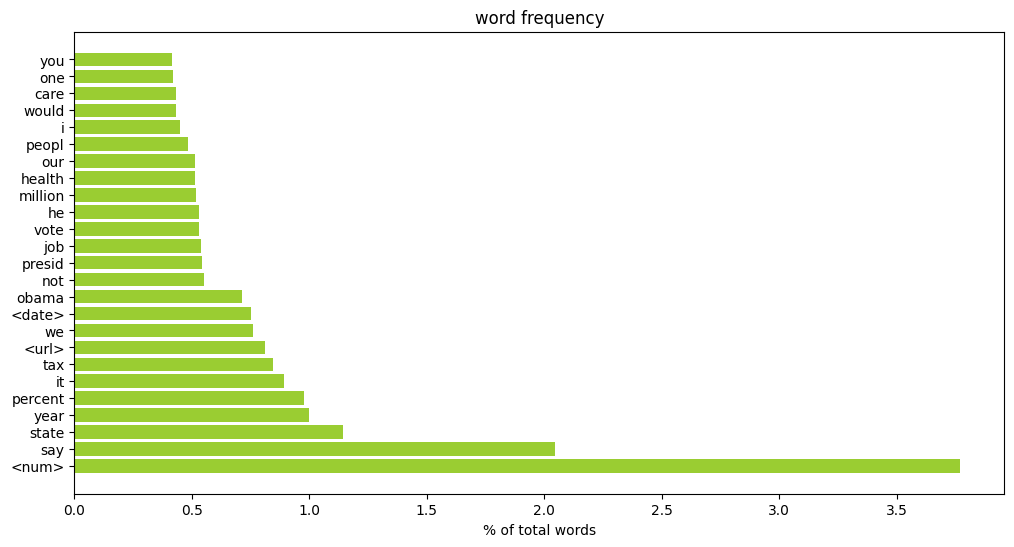

In [687]:
Stat.plot_word_frequency_barplot()

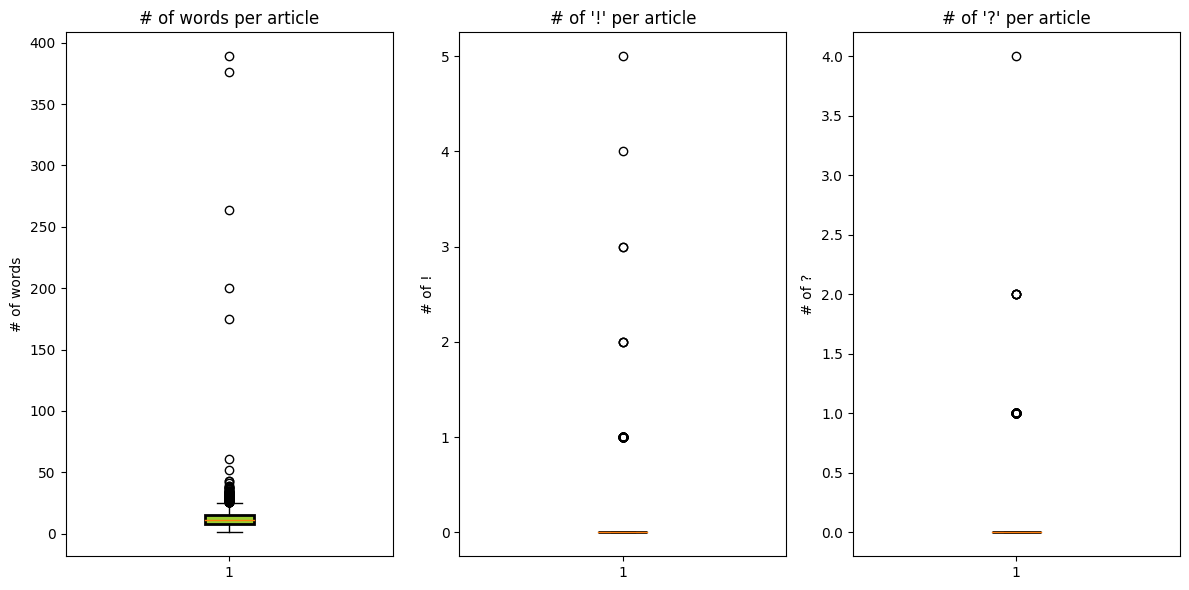

In [688]:
Stat.plot_word_frequency_boxplot()

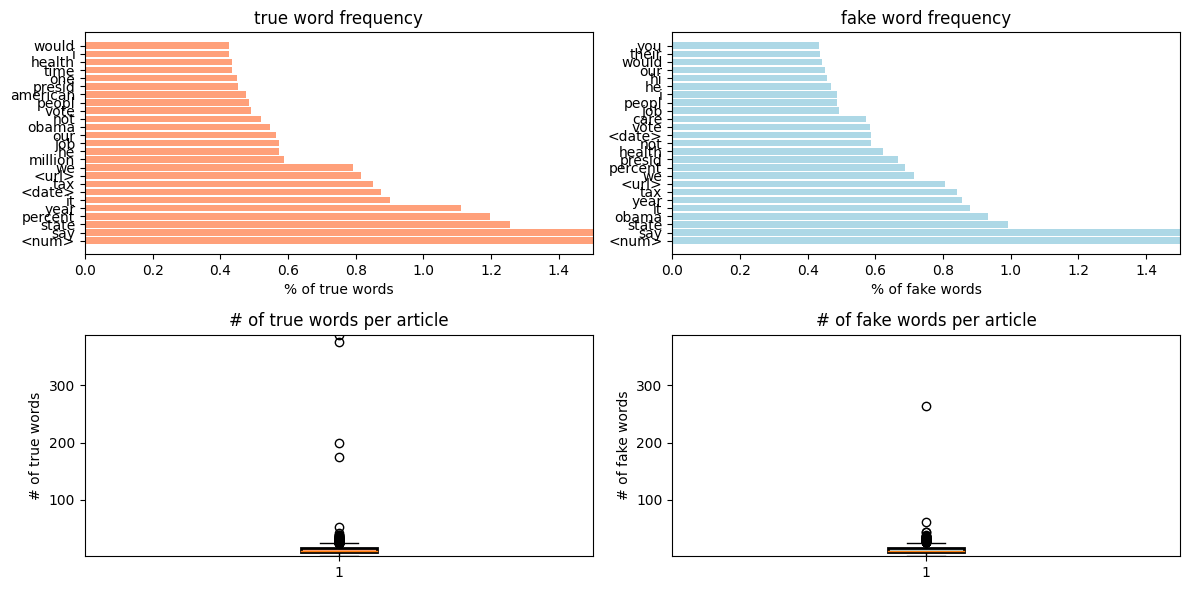

In [689]:
Stat.plot_word_frequency_fake_vs_true()

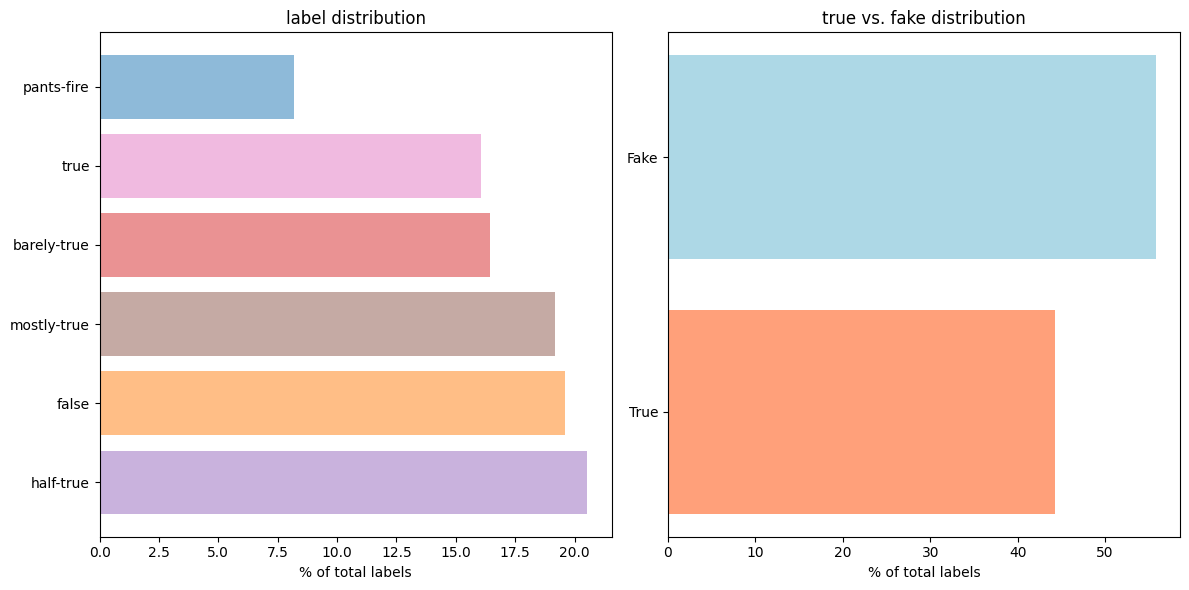

In [690]:
Stat.plot_type_fake_vs_true()

In [691]:
if not liar_set:
    Stat.barplot_domain()

In [692]:
threshold=0
percentage=True
if not liar_set:
    Stat.barplot_x_to_y_contribution(threshold=threshold, percentage=percentage, x_label='domain', y_label='type', content_label='content_cleaned', title=f'domain contribution to label ( ≥ {threshold}%)' if percentage else f'domain contribution to label ( {threshold} most frequent)')

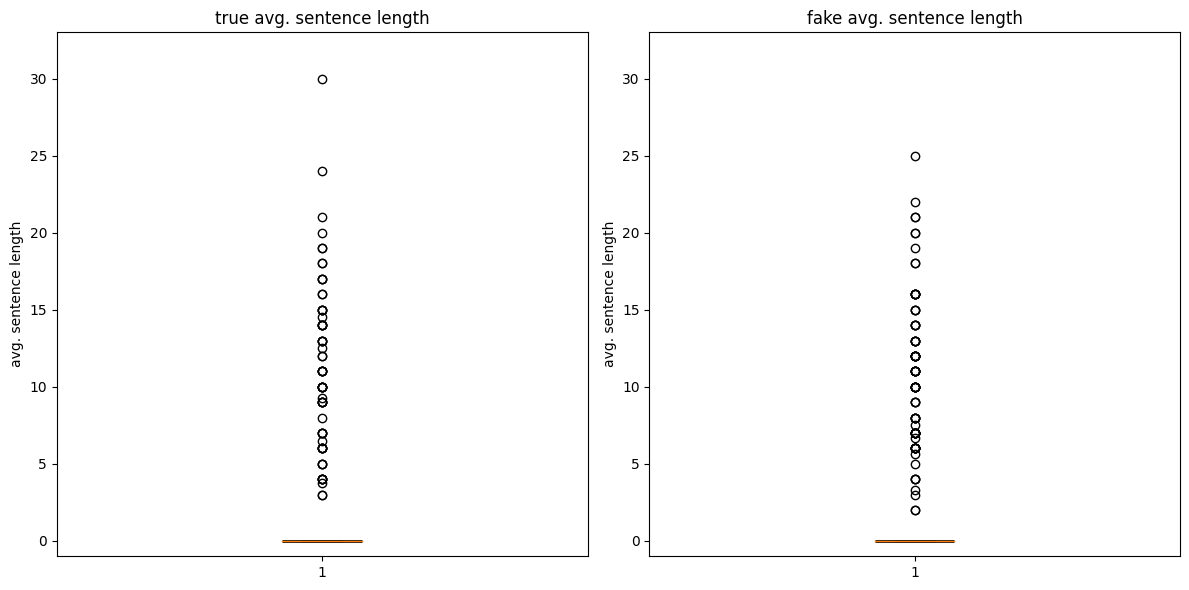

In [693]:
Stat.plot_average_sentence_length_fake_vs_true()

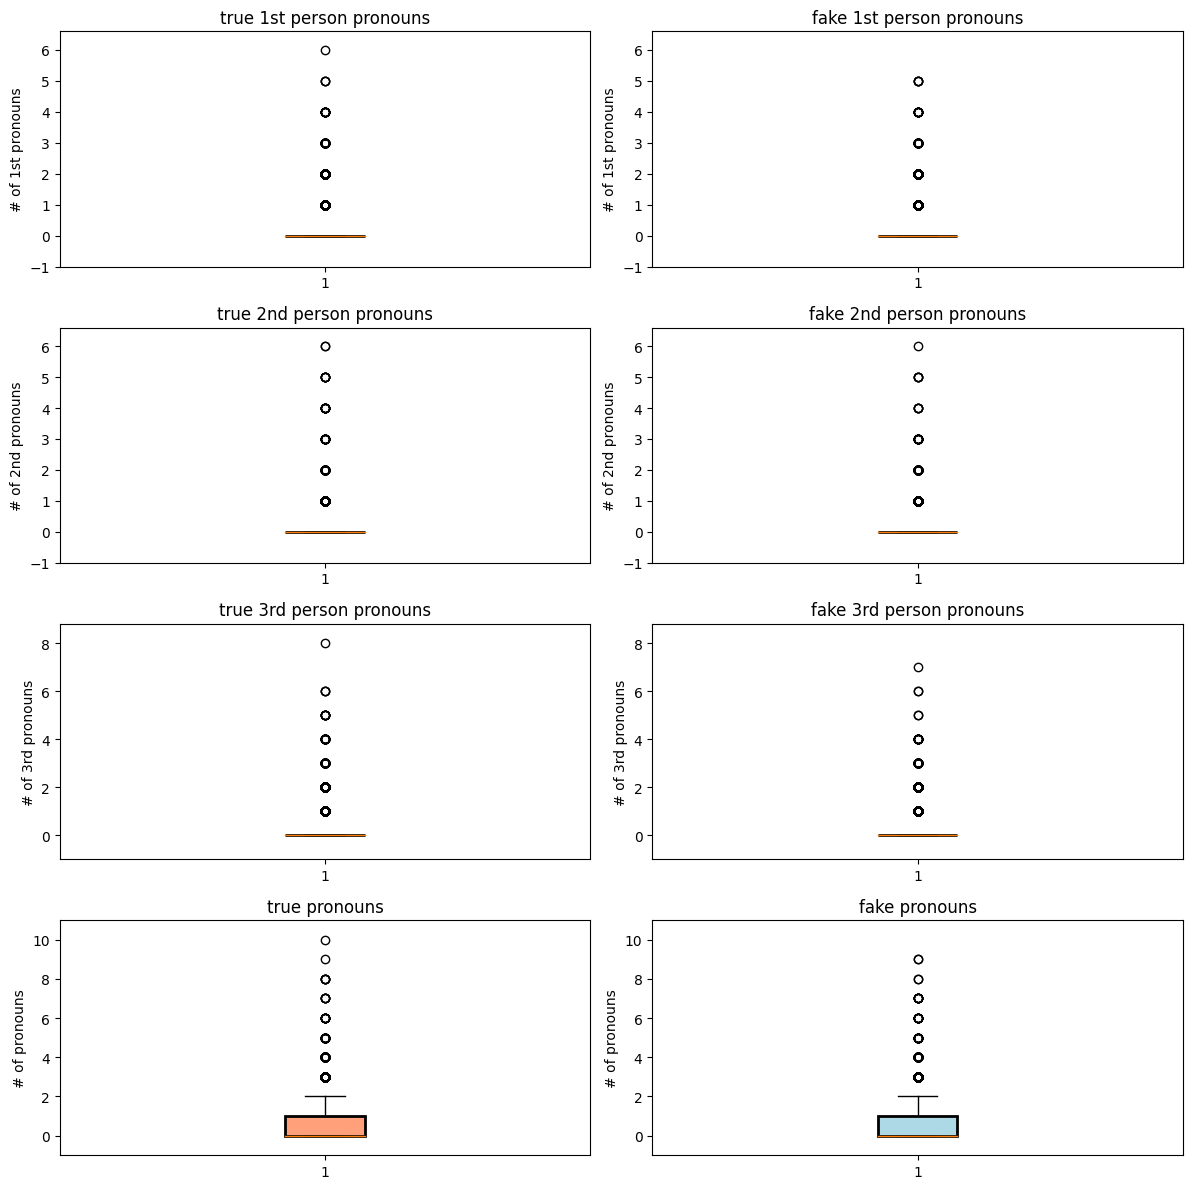

In [694]:
Stat.plot_pronouns_fake_vs_true()

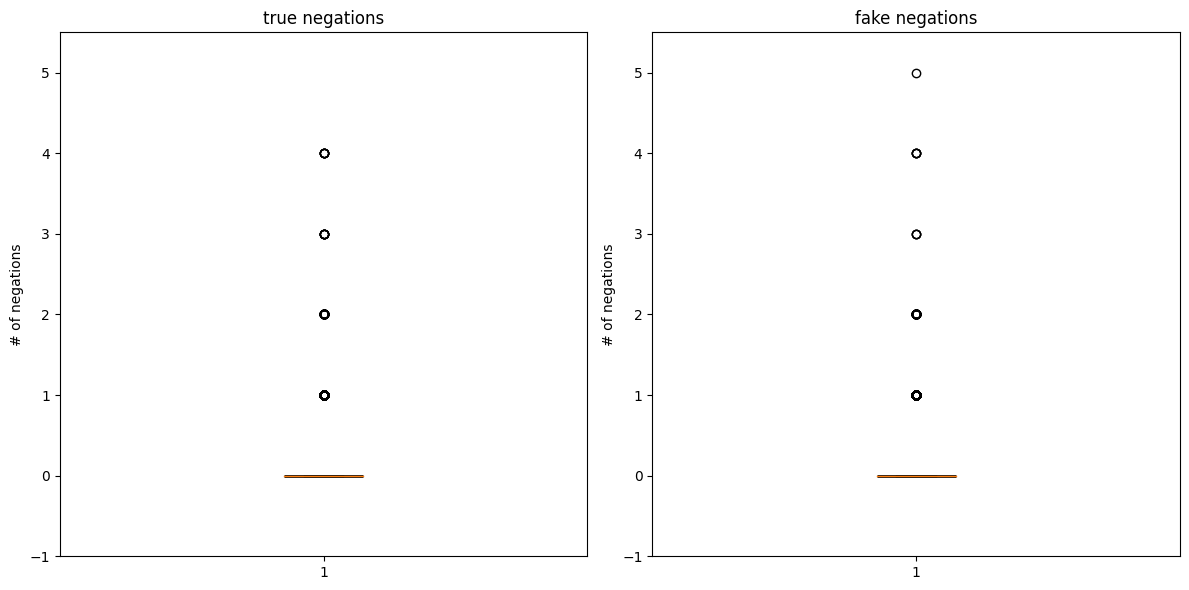

In [695]:
Stat.plot_negations_fake_vs_true()

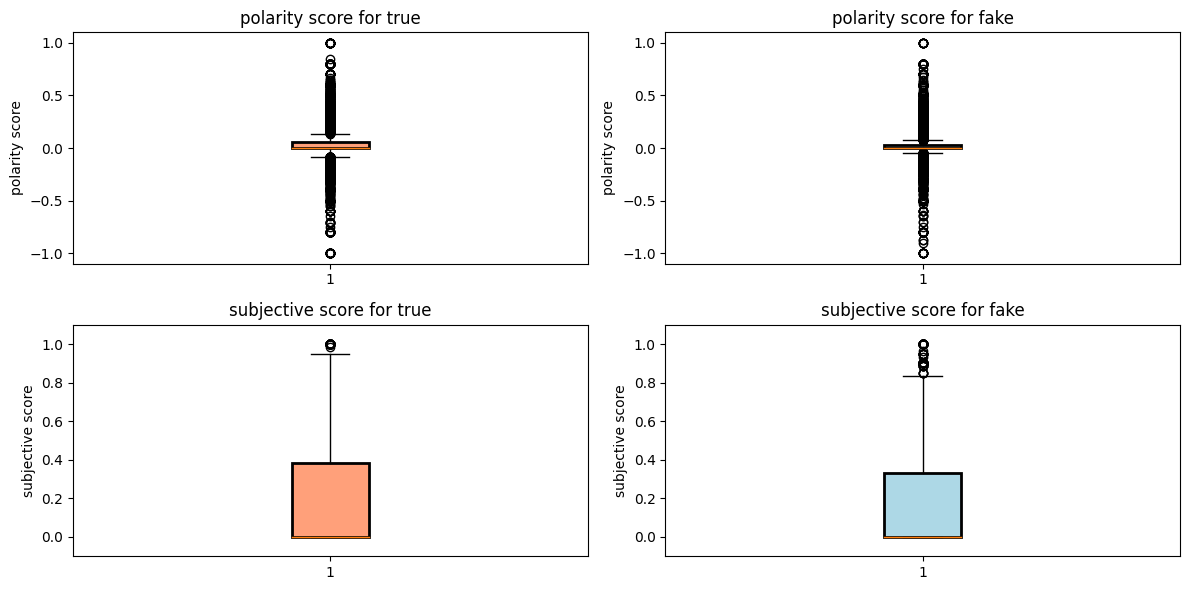

In [696]:
Stat.plot_sentence_analysis_fake_vs_true()

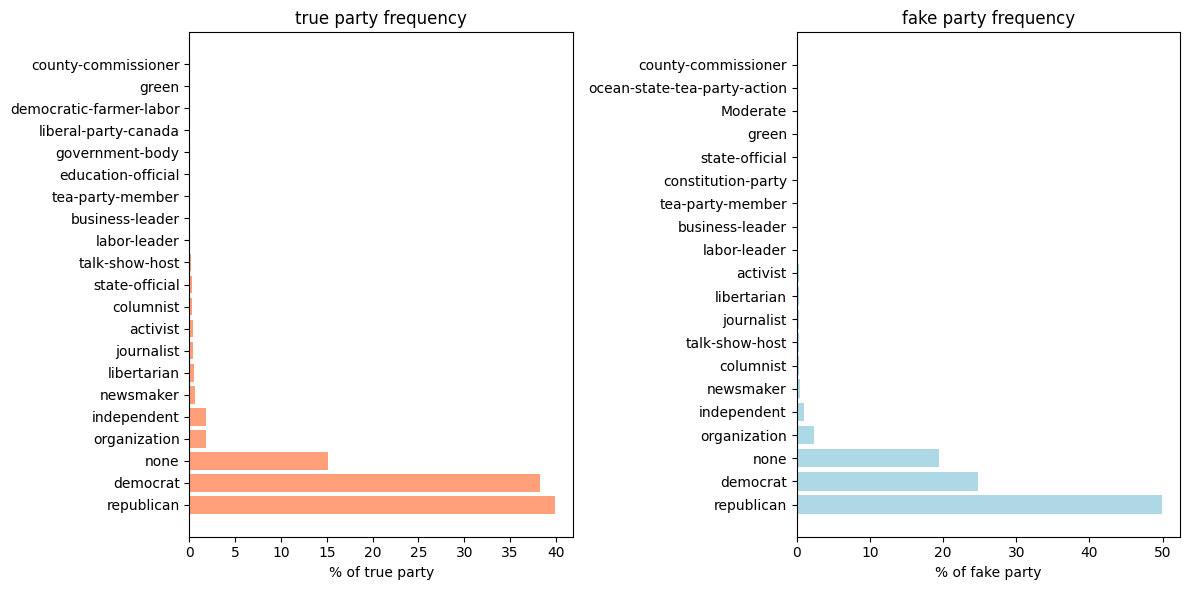

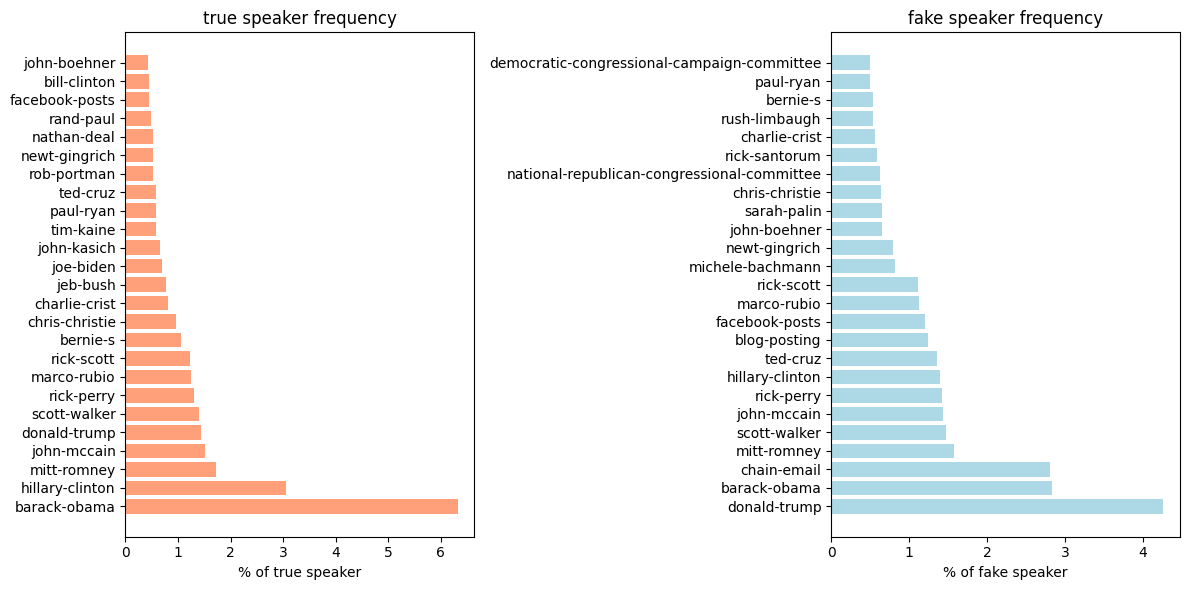

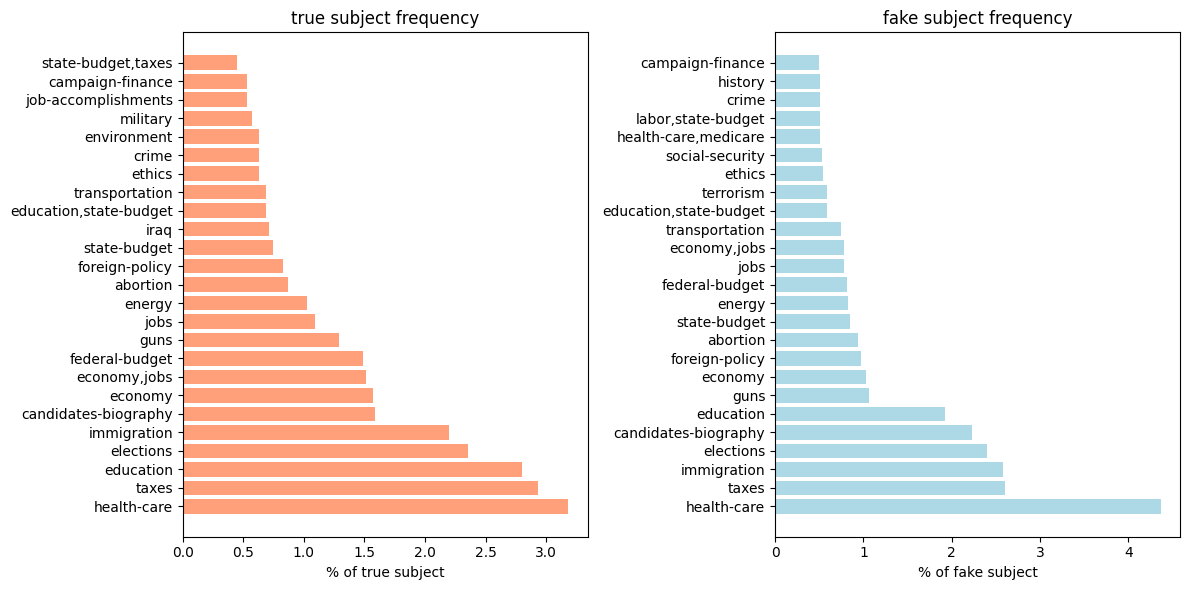

In [697]:
if liar_set:
    Stat.plot_party_fake_vs_true()
    Stat.plot_speaker_fake_vs_true()
    Stat.plot_subjects_fake_vs_true()